# AI has many sub-fields: 

## Natural Language Processing (NLP) deals with sentiment analysis
- We will look at `VADER`
- Sentiment analysis looks at the tone, emotions of free-from-text

## Machine Learning (ML) deals with predictive analysis
- We will look at `Linear Regression`
- Predictive analysis looks at past data, tries to generalize trends, and then tries to predict future data.

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# If you get an error running this, run the following in a new cell:
# !pip install vaderSentiment

In [4]:
# We can use SentimentIntensityAnalyzer by storing an instance of it in a variable.
sa = SentimentIntensityAnalyzer()

In [6]:
sa.polarity_scores("I don't like Monday.")

{'neg': 0.413, 'neu': 0.587, 'pos': 0.0, 'compound': -0.2755}

### When we run the sentiment analyzer, we get 4 values
1. `neg` stands for negative. This ranges from [0,1].
2. `neu` stands for neural. This ranges from [0,1].
3. `pos` stands for positive. This ranges from [0,1].
4. `compound` is a unidimentional single value that gives you an overview of the overall sentiment for the text. It's values range from -1 to 1 where values close to -1 indicate a sad tone and values close to 1 indicate a positive/happy tone.

In [8]:
import pandas as pd

In [10]:
df = pd.read_csv("./Cleaned_Inaugural_Speeches.csv")

In [12]:
df.sample(10)

,Name,Inaugural Address,Date,text
50,George Bush,Inaugural Address,"Friday, January 20, 1989","Mr. Chief Justice, Mr. President, Vice Preside..."
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
9,John Quincy Adams,Inaugural Address,"Friday, March 4, 1825",IN compliance with an usage coeval with the ex...
8,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not attempt to descri...
37,Franklin D. Roosevelt,Second Inaugural Address,"Wednesday, January 20, 1937",WHEN four years ago we met to inaugurate a Pre...
33,Warren G. Harding,Inaugural Address,"Friday, March 4, 1921",My Countrymen: WHEN one surveys the world abou...
35,Herbert Hoover,Inaugural Address,"Monday, March 4, 1929",My Countrymen: THIS occasion is not alone the ...
25,Benjamin Harrison,Inaugural Address,"Monday, March 4, 1889",Fellow-Citizens: THERE is no constitutional or...
16,Franklin Pierce,Inaugural Address,"Friday, March 4, 1853",My Countrymen: IT a relief to feel that no hea...
44,Lyndon Baines Johnson,Inaugural Address,"Wednesday, January 20, 1965","My fellow countrymen, on this occasion, the oa..."


In [14]:
text_of_first_row = df['text'][1]

In [16]:
text_of_first_row

'Fellow Citizens: I AM again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America. Previous to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.'

In [18]:
sa.polarity_scores(text_of_first_row)

{'neg': 0.054, 'neu': 0.868, 'pos': 0.079, 'compound': 0.5719}

In [20]:
sa.polarity_scores(df['text'][10])

{'neg': 0.032, 'neu': 0.778, 'pos': 0.19, 'compound': 0.9996}

In [22]:
# We want to make a for loop to look at all texts for the dataset
# Then run Sentiment Analysis on it
for index, row in df.iterrows():
    sa_for_row = sa.polarity_scores(row['text'])

    print(f"The sentiment analysis for row {index + 1} is {sa_for_row}")

The sentiment analysis for row 1 is {'neg': 0.046, 'neu': 0.719, 'pos': 0.235, 'compound': 0.9999}
The sentiment analysis for row 2 is {'neg': 0.054, 'neu': 0.868, 'pos': 0.079, 'compound': 0.5719}
The sentiment analysis for row 3 is {'neg': 0.044, 'neu': 0.697, 'pos': 0.259, 'compound': 1.0}
The sentiment analysis for row 4 is {'neg': 0.076, 'neu': 0.701, 'pos': 0.223, 'compound': 0.9999}
The sentiment analysis for row 5 is {'neg': 0.059, 'neu': 0.771, 'pos': 0.169, 'compound': 0.9998}
The sentiment analysis for row 6 is {'neg': 0.048, 'neu': 0.779, 'pos': 0.173, 'compound': 0.9991}
The sentiment analysis for row 7 is {'neg': 0.127, 'neu': 0.726, 'pos': 0.147, 'compound': 0.9737}
The sentiment analysis for row 8 is {'neg': 0.054, 'neu': 0.731, 'pos': 0.215, 'compound': 1.0}
The sentiment analysis for row 9 is {'neg': 0.061, 'neu': 0.749, 'pos': 0.19, 'compound': 1.0}
The sentiment analysis for row 10 is {'neg': 0.055, 'neu': 0.745, 'pos': 0.2, 'compound': 0.9999}
The sentiment analysi

In [24]:
len(df)

58

In [26]:
df['text'][19]

'Fellow-Countrymen: AT this second appearing to take the oath of the Presidential office there is less occasion for an extended address than there was at the first. Then a statement somewhat in detail of a course to be pursued seemed fitting and proper. Now, at the expiration of four years, during which public declarations have been constantly called forth on every point and phase of the great contest which still absorbs the attention and engrosses the energies of the nation, little that is new could be presented. The progress of our arms, upon which all else chiefly depends, is as well known to the public as to myself, and it is, I trust, reasonably satisfactory and encouraging to all. With high hope for the future, no prediction in regard to it is ventured. On the occasion corresponding to this four years ago all thoughts were anxiously directed to an impending civil war. All dreaded it, all sought to avert it. While the inaugural address was being delivered from this place, devoted 

In [50]:
sa.polarity_scores("War")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}

### One other thing we can do is look at variations in Speech Length

In [36]:
df.columns

Index(['Name', 'Inaugural Address', 'Date', 'text'], dtype='object')

In [40]:
## We're going to graph Speech Length (words) vs. Date (yrs.)

df['Speech Length'] = df['text'].str.split().str.len()


df['Speech Year'] = pd.DatetimeIndex(df['Date']).year

In [42]:
df.sample(10)

,Name,Inaugural Address,Date,text,Speech Length,Speech Year
16,Franklin Pierce,Inaugural Address,"Friday, March 4, 1853",My Countrymen: IT a relief to feel that no hea...,3333,1853
21,Ulysses S. Grant,Second Inaugural Address,"Tuesday, March 4, 1873",Fellow-Citizens: UNDER Providence I have been ...,1337,1873
43,John F. Kennedy,Inaugural Address,"Friday, January 20, 1961","Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,1961
8,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not attempt to descri...,4462,1821
49,Ronald Reagan,Second Inaugural Address,"Monday, January 21, 1985","Senator Mathias, Chief Justice Burger, Vice Pr...",2557,1985
30,William Howard Taft,Inaugural Address,"Thursday, March 4, 1909",My Fellow-Citizens: ANYONE who has taken the o...,5431,1909
13,William Henry Harrison,Inaugural Address,"Thursday, March 4, 1841",CALLED from a retirement which I had supposed ...,5580,1841
27,William McKinley,First Inaugural Address,"Thursday, March 4, 1897",Fellow-Citizens: IN obedience to the will of t...,3965,1897
7,James Monroe,First Inaugural Address,"Tuesday, March 4, 1817",I SHOULD be destitute of feeling if I was not ...,3370,1817
52,Bill Clinton,Second Inaugural Address,20-Jan-97,My fellow citizens: At this last presidential ...,2170,1997


<Axes: title={'center': 'Speech Length (words) vs. Date (yrs.)'}, xlabel='Speech Year', ylabel='Speech Length'>

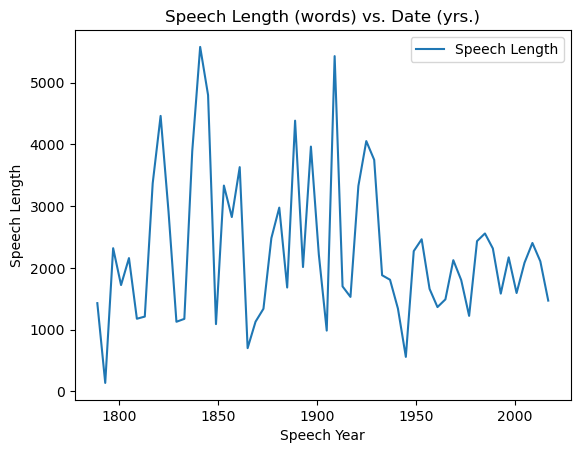

In [54]:
# We can choose from something like line, bar, pie, scatter

df.plot(kind='line', x='Speech Year', y='Speech Length', title='Speech Length (words) vs. Date (yrs.)', ylabel="Speech Length")



### We just demonstarted how to do sentiment analysis on a complete dataset using a form of AI.
The compound scores give us more clues/insights on the dataset.
`VADER` is good at finding the tone of social media data.

## Linear Regression (LR)
It's a simple algorithm for machine learning. It's used to do predictive analysis on data.
There are two types:
- Simple LR: y_pred = ax + b
- Multiple LR: y_pred = a1x1 + a2x2 + ... + b

### Simple Linear Regression
- 1 Independent variable (what informs the value for the dependent variable)
- 1 Dependent variable (what we are trying to predict)

### Multiple Linear Regression
- More than 1 Independent variable
- 1 Dependent variable

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [63]:
df_2 = pd.read_csv("Boston House Prices.csv")

In [65]:
df_2.sample(10)

,Rooms,Distance,Value
297,5.790,6.3200,20.3
418,5.957,1.8026,8.8
109,6.229,2.5451,19.4
19,5.727,3.7965,18.2
308,6.635,3.3175,22.8
11,6.009,6.2267,18.9
454,6.728,2.4961,14.9
381,6.545,1.5192,10.9
230,5.981,3.6715,24.3
124,5.879,2.0063,18.8


### Describing the data...
1. `Rooms` is the avergae no. of rooms in a house
2. `Distance` is the average distance of the house from the top 3 employment centers
3. `Value` is the value of the house in $1,000s

In [68]:
df_2.shape

(506, 3)

In [70]:
# Independent variable(s)
# Remember to put two square brackets before and after
X = df_2[['Rooms']]

# Dependent variable
y = df_2['Value']

In [72]:
lm.fit(X, y)

LinearRegression()

In [74]:
# to get a in y_pred = ax +b:
a = lm.coef_

In [76]:
# to get b in y_pred = ax +b:
b = lm.intercept_

In [78]:
a

array([9.10210898])

In [80]:
b

-34.67062077643857

### My equation is `y_pred = 9.1x - 34.67`

In [143]:
y_pred = 9.1 * df_2['Rooms'] - 34.67

In [95]:
lm.predict([[3.9]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.82760425])

### The approximation was not exactly accurate. How can we measure this?
We use `r squared`

In [108]:
lm.score(X, y)

0.48352545599133423

In this case, `Rooms` informs 48.35% of the variability of `Value`. Let's see a case for multiple linear regression. Does it improve the relationship?

## Let's graph this...

- We want to graph the actual X and y
- We want to graph the line of best fit (`y_pred`)

In [98]:
import matplotlib.pyplot as plt

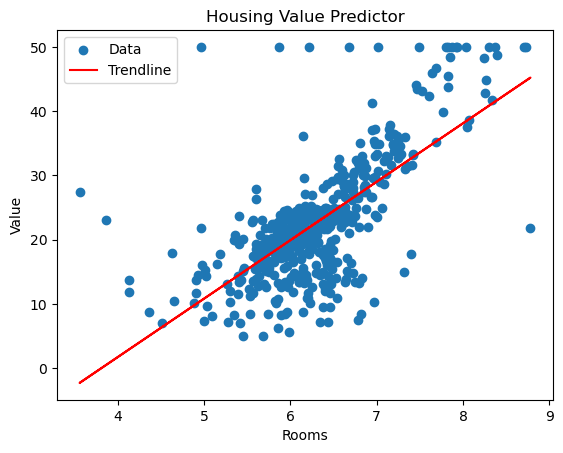

In [147]:
# plot the actual X and y
plt.scatter(df_2['Rooms'], df_2['Value'], label='Data')

# plot the trendline y_pred
plt.plot(df_2['Rooms'], y_pred, color='red', label='Trendline')

# Labels and legend
plt.xlabel('Rooms')
plt.ylabel('Value')
plt.title('Housing Value Predictor')
plt.legend()
plt.show()

In [120]:
# Independent variable
X_2 = df_2[['Rooms', 'Distance']]

# Dependent variable
y_2 = df_2['Value']

In [122]:
lm_2 = LinearRegression()

In [124]:
lm_2.fit(X_2, y_2)

LinearRegression()

In [126]:
# to get a in y_pred = ax +b:
a = lm_2.coef_

In [128]:
# to get b in y_pred = ax +b:
b = lm_2.intercept_

In [130]:
a

array([8.80141183, 0.48884854])

In [132]:
b

-34.636050175473315

### My equation is `y_pred = 8.8x1 + 0.49x2 - 34.63`

In [127]:
y_pred_2 = 8.8 * df_2['Rooms'] + 0.49 * df_2['Distance'] - 34.63

In [137]:
lm_2.predict([[5.790, 6.3200]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.41364706])

In [139]:
lm_2.score(X_2, y_2)

0.4955246476058477